# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


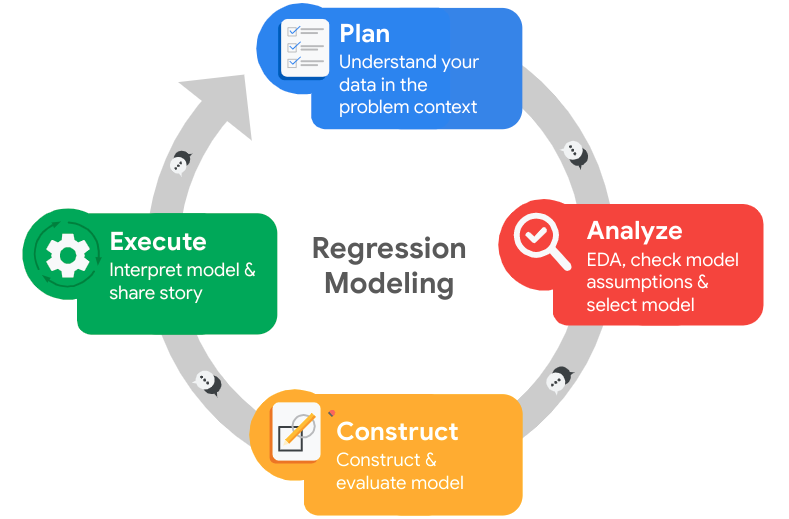

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Plan Stage Reflections on Stakeholders, Objectives, First Steps, Resources, and Ethical Considerations.

### Stakeholders
- **HR Department**
- **Management/Executives**
- **Employees**

### Objectives
- Predict employee turnover.
- Identify key factors contributing to turnover.
- Provide actionable insights to improve retention.

### Initial Observations
- Data structure and completeness.
- Feature correlations with turnover.
- Distribution and variability of key features.

### Resources
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)

### Ethical Considerations
- **Data Privacy**: Maintain confidentiality.
- **Bias and Fairness**: Avoid introducing biases.
- **Transparency**: Clearly communicate findings.
- **Employee Impact**: Focus on improving work conditions.


## Step 1. Imports

### Import packages

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed, i.e. convert to `snake_case` and correct spelling
df0 = df0.rename(columns = {'Work_accident': 'work_accident',
                            'average_montly_hours': 'average_monthly_hours',
                            'time_spend_company': 'tenure',
                            'Department':'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in Salifort Dataset.

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The output shows the first occurences of duplicated rows in our dataframe. It is very unlikely that more than 1 employees self-reported the same responses exactly, especially since our data include several contuous variables. 

Therefore, we should drop duplicates.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

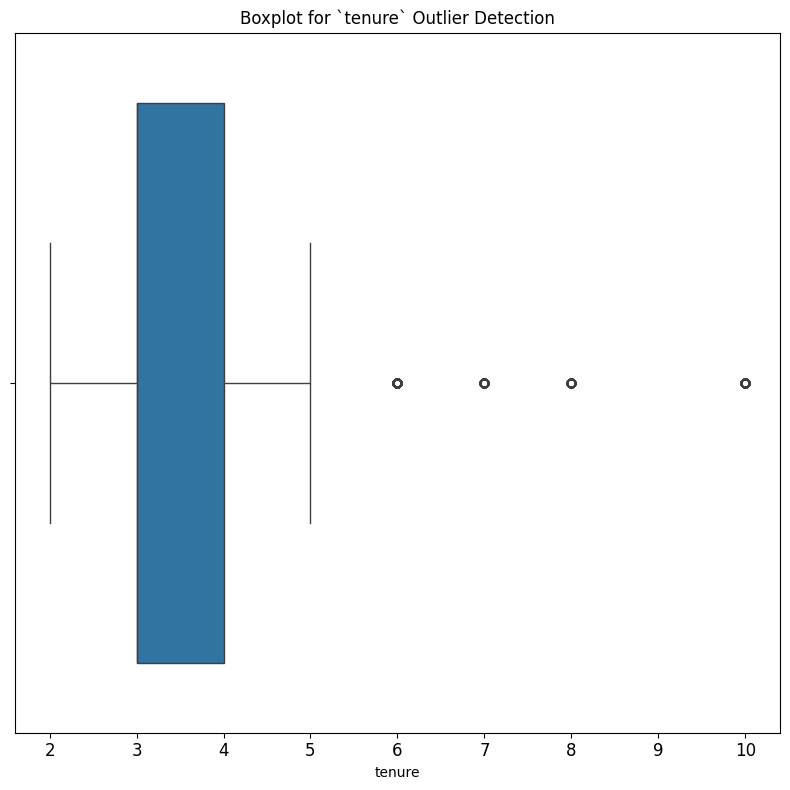

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

plt.figure(figsize = (8,8))
plt.title('Boxplot for `tenure` Outlier Detection')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x=df1['tenure'])
plt.tight_layout()
plt.show()



In [12]:
# Determine the number of rows containing outliers
p25 = df1['tenure'].quantile(0.25)
p75 = df1['tenure'].quantile(0.75)

iqr = p75 - p25

upper = p75 + 1.5*iqr
lower = p25 - 1.5*iqr

print("Lower limit:", lower)
print("Upper limit:", upper)

#create filter for outliers
outlier_filter = (df1['tenure'] > upper) | (df1['tenure'] < lower)

#select outliers using outlier_filter
outliers = df1[outlier_filter]

#count entries with outliers in `tenure` column
print("Number of entries containing `tenure` outliers:", len(outliers))



Lower limit: 1.5
Upper limit: 5.5
Number of entries containing `tenure` outliers: 824


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### Correlation Heatmap

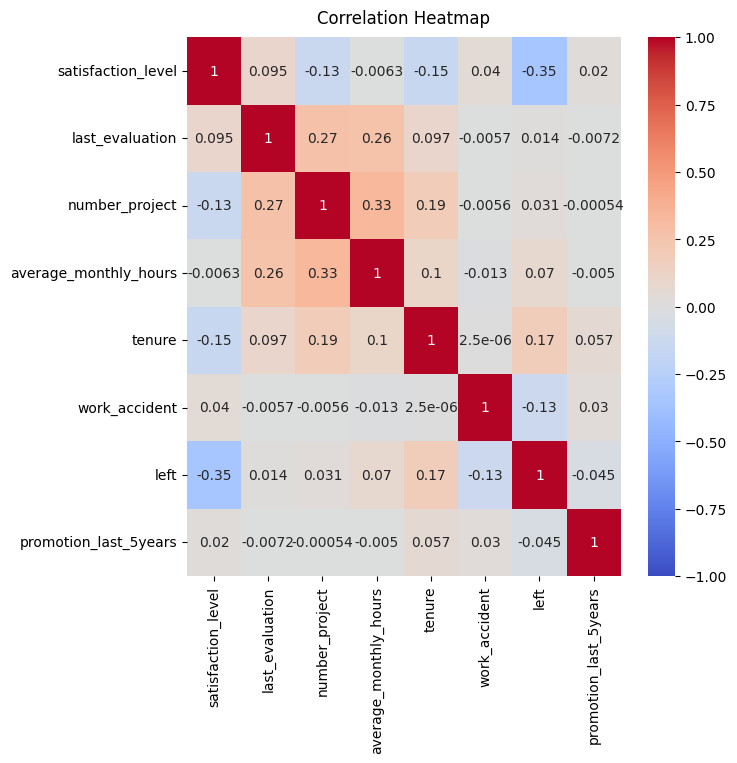

In [15]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[float, int])
# correlation heatmap
plt.figure(figsize = (7,7))
heatmap = sns.heatmap(numeric_df.corr(), vmin =-1, vmax=1, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':12}, pad = 10)
plt.show()

The correlation heatmap shows that the **number of projects, monthly hours, and evaluation scores are positively correlated** with each other. Additionally, it indicates that **employee retention is negatively correlated with satisfaction** level.


#### `average_monthly_hours` by `number_project`

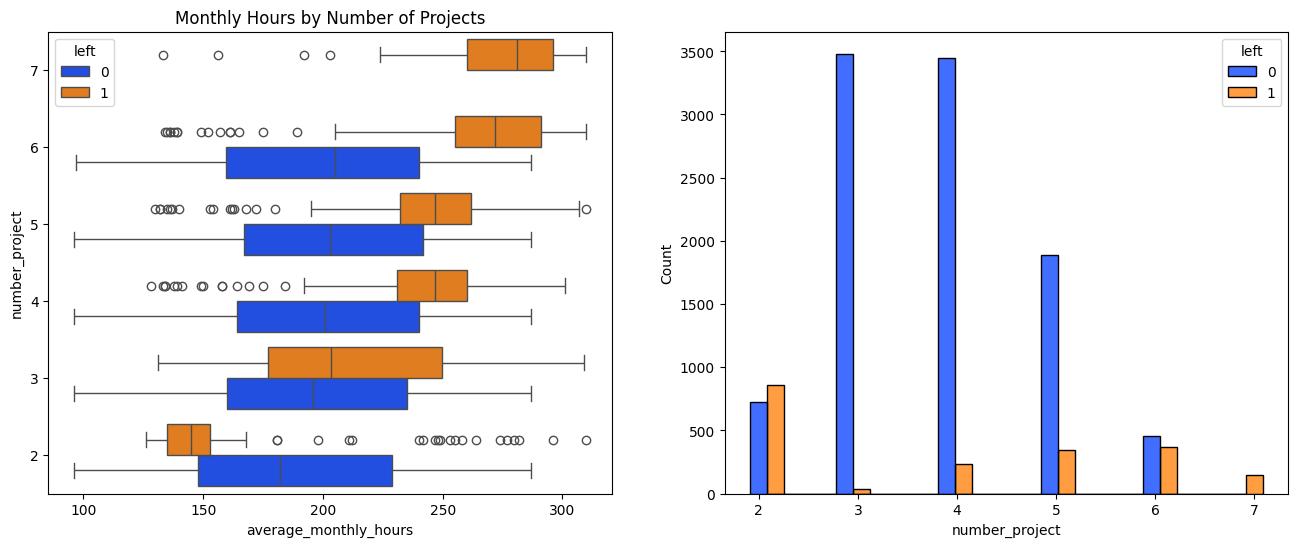

In [16]:
#investigate relation ship between `average_monthly_hours` AND `number_projects`
fig, ax = plt.subplots(1,2, figsize = (16,6))

#boxplot for `average_monthly_hours` distribution for different `number_project` - stayed vs left
sns.boxplot(data = df1, x = 'average_monthly_hours', y='number_project', hue = 'left', orient = 'h', ax = ax[0], palette='bright')
ax[0].invert_yaxis()
ax[0].set_title('Monthly Hours by Number of Projects')

#histogram for `number_project`distribution - stayed vs left
sns.histplot(data = df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax = ax[1], palette='bright')

plt.show()


It's common for employees working on more projects to log more hours. This trend is evident as the average hours increase with the number of projects. However, some key observations emerge:

1. Two groups of employees left: (A) those working significantly fewer hours than peers, possibly fired or on notice, and (B) those working excessively, likely quitting due to overwork. Group B likely contributed heavily to projects.

2. All employees with seven projects left, with those working six projects also logging high hours (~250–300 hours/month), much more than other groups.

3. The optimal number of projects appears to be 3–4, with a low ratio of employees leaving.

4. Assuming a 40-hour work week and two weeks of vacation annually, the average monthly hours are 166.67. Most groups, except those with two projects, worked significantly more, indicating overall overwork.


#### `average_monthly_hours` by `satisfaction_level`

Text(0.5, 1.0, 'Monthly Hours by Satisfaction Level')

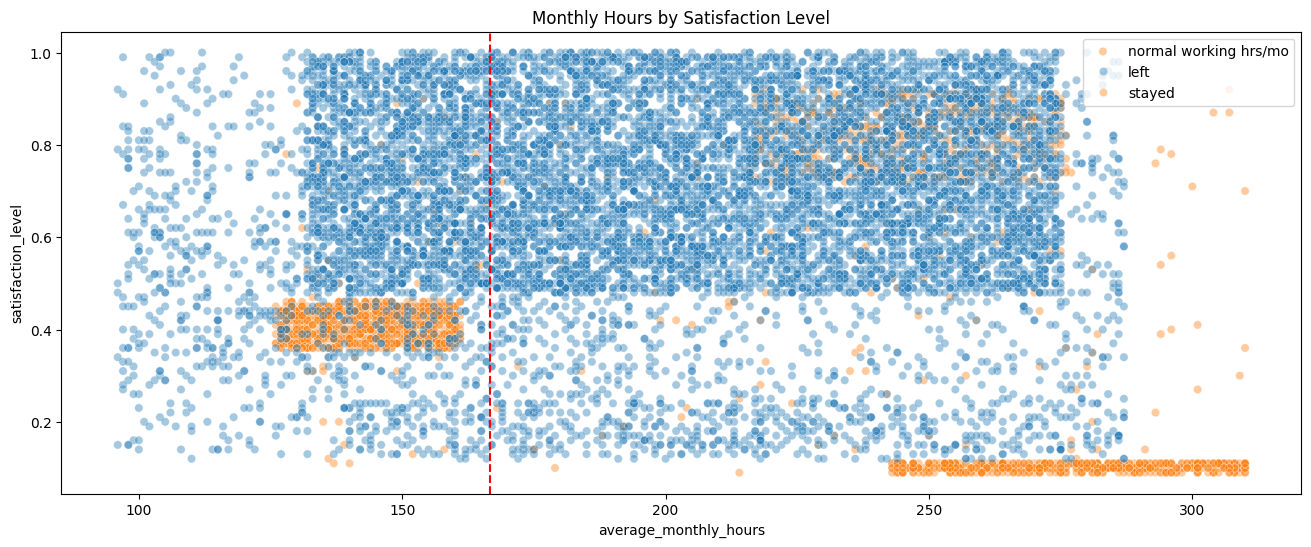

In [17]:
# scatterplot of `average_monthly_hours` by `satisfaction_level` - stayed vs left
plt.figure(figsize = (16,6))
sns.scatterplot(data= df1, x ='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4 )
plt.axvline(x=166.7, color='red', label = 'normal working hrs/mo', ls='--')
plt.legend(labels=['normal working hrs/mo','left', 'stayed'])
plt.title('Monthly Hours by Satisfaction Level')

Observations:
1. A large group worked ~240–315 hours/month, equating to over 75 hours/week, likely causing near-zero satisfaction.
2. Another group left despite normal hours, with low satisfaction (~0.4), possibly due to pressure to work more.
3. A group working ~210–280 hours/month had higher satisfaction (~0.7–0.9). In this category there is a cluster that left, suggesting that they enjoy their work but likely found a similar position with more viable working hours.
4. The unusual distribution shape suggests data manipulation or synthetic data.



#### `satisfaction_level` by `tenure`

<Axes: xlabel='tenure', ylabel='Count'>

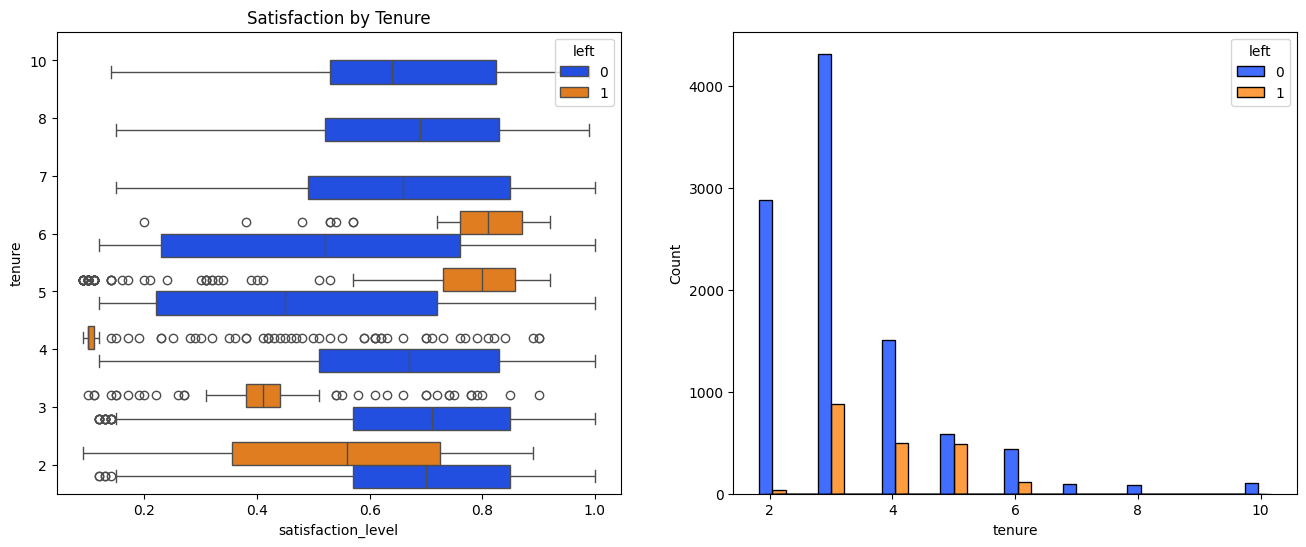

In [18]:
# initiate sublots
fig, ax = plt.subplots(1,2,figsize=(16,6))

#1. create boxplot for `satisfaction_level` distribution bt`tenure` - stayed vs left
sns.boxplot(data=df1, x='satisfaction_level', y = 'tenure', hue='left', orient = 'h', ax=ax[0], palette='bright')
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by Tenure', fontsize='12')

#2. histogram for `tenure` distribution - stayed vs left
sns.histplot(data = df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1], palette='bright')


Observations:
1. Employees who left generally fall into two categories: dissatisfied with shorter tenures and very satisfied with medium-length tenures.
2. Four-year employees who left have unusually low satisfaction, suggesting a need to investigate policy changes affecting them.
3. Longest-tenured employees didn't leave, and their satisfaction levels are similar to newer employees who stayed.
4. Few longer-tenured employees exist, possibly indicating they are higher-ranking and higher-paid.


In [19]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\antar\AppData\Local\Temp\ipykernel_14636\1074052523.py:2: FutureWarning: The provided callable <function mean at 0x00000206DB010D60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\antar\AppData\Local\Temp\ipykernel_14636\1074052523.py:2: FutureWarning: The provided callable <function median at 0x00000206DB13C040> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


1. The mean and median satisfaction scores of employees who left are lower than those who stayed.
2. Among employees who stayed, the mean satisfaction score is slightly below the median, indicating a left-skewed distribution.


#### `salary` by `tenure`

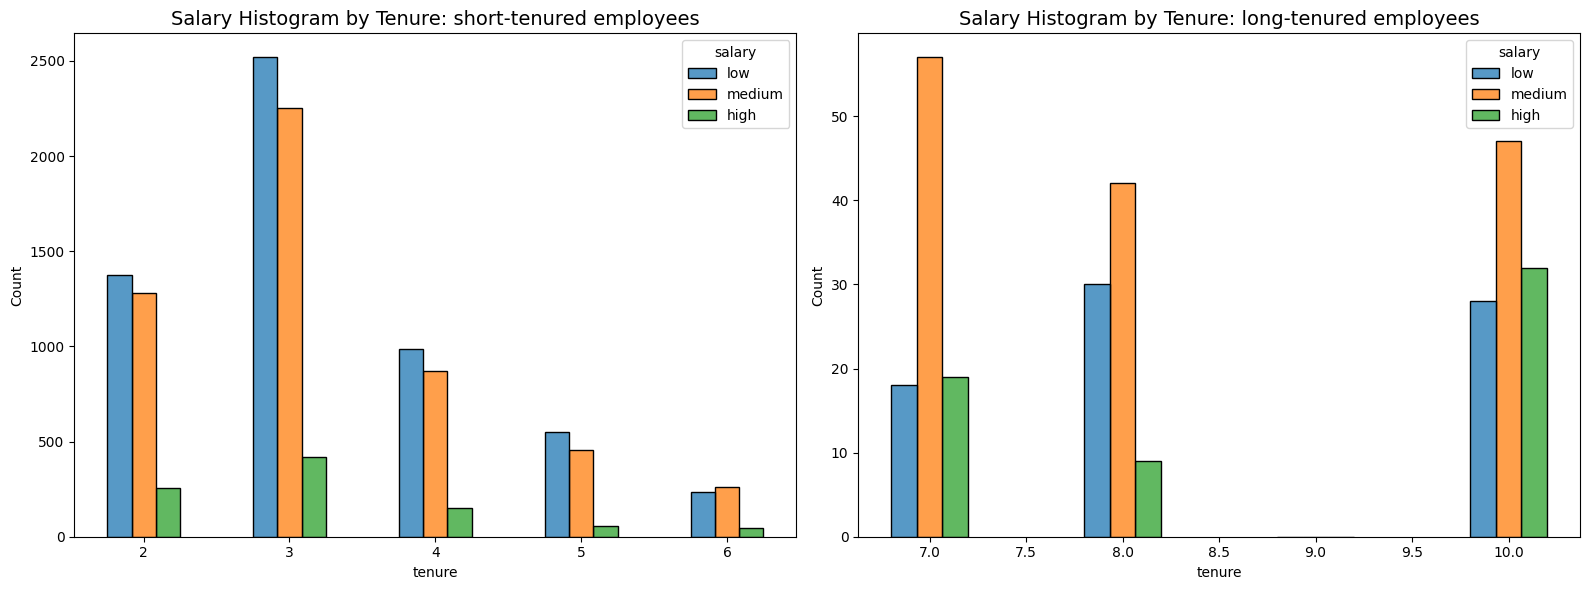

In [20]:
# initiate sublots
fig, ax = plt.subplots(1,2,figsize=(16,6))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary Histogram by Tenure: short-tenured employees', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary Histogram by Tenure: long-tenured employees', fontsize='14')

plt.tight_layout()
plt.show();


- Long-tenured employees are not disproportionately higher-paid, indicating tenure does not correlate with higher pay.

#### `average_monthly_hours` vs `last_evaluation`

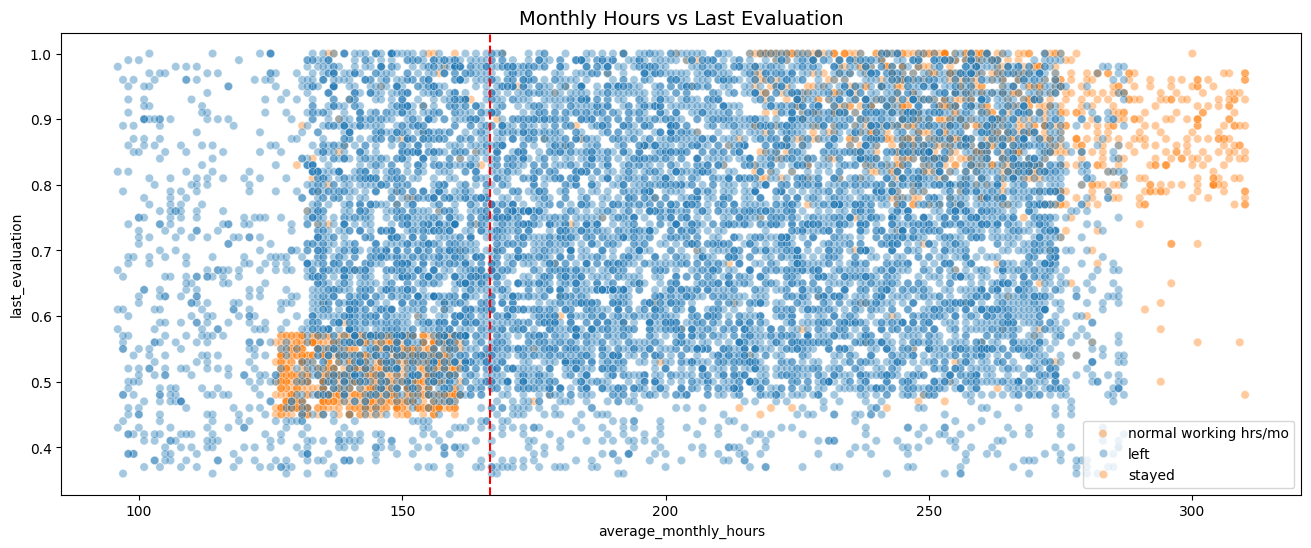

In [21]:
# scatterplot of `average_monthly_hours` vs `last_evaluation`
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.7, color='red', label = 'normal working hrs/mo', ls='--')
plt.legend(labels=['normal working hrs/mo','left', 'stayed'])
plt.title('Monthly Hours vs Last Evaluation', fontsize='14');


Observations:
1. The scatterplot indicates two groups of employees who left: overworked employees with high performance and those working slightly below the typical average of 166.67 hours with lower evaluation scores.
2. There seems to be a correlation between hours worked and evaluation scores.
3. Few employees are in the upper left quadrant of the plot. This indicates that working long hours is not a necessary requirement for a good evaluation.
4. Most employees in the company work well over 167 hours per month.

#### `average_monthly_hours` vs `promotion_last_5years`

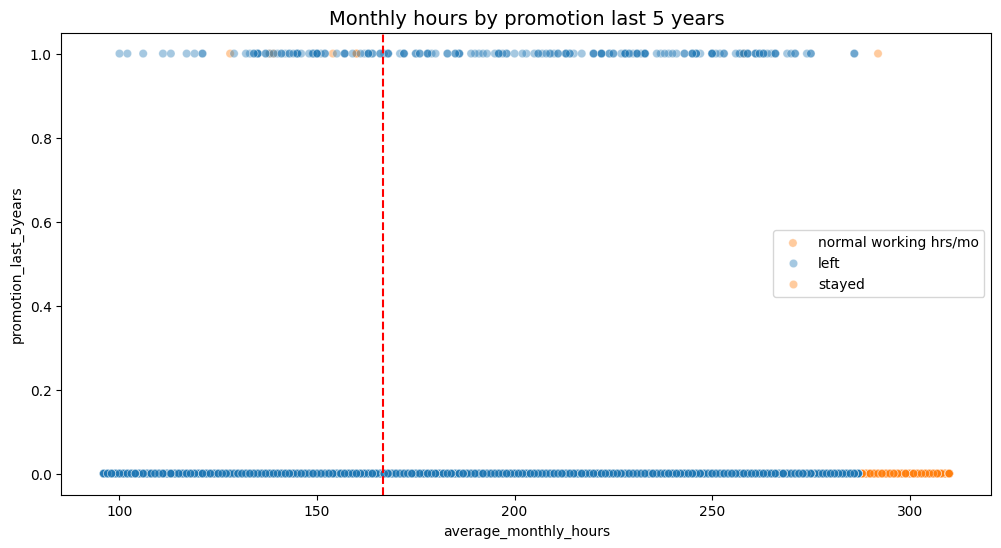

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.7, color='red', label = 'normal working hrs/mo', ls='--')
plt.legend(labels=['normal working hrs/mo','left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');


Observations:
1. Few employees promoted in the last five years have left the company.
2. Very Few of the highest-hour workers received promotions.
3. All departing employees were those working the longest hours.


#### `left` by `department`

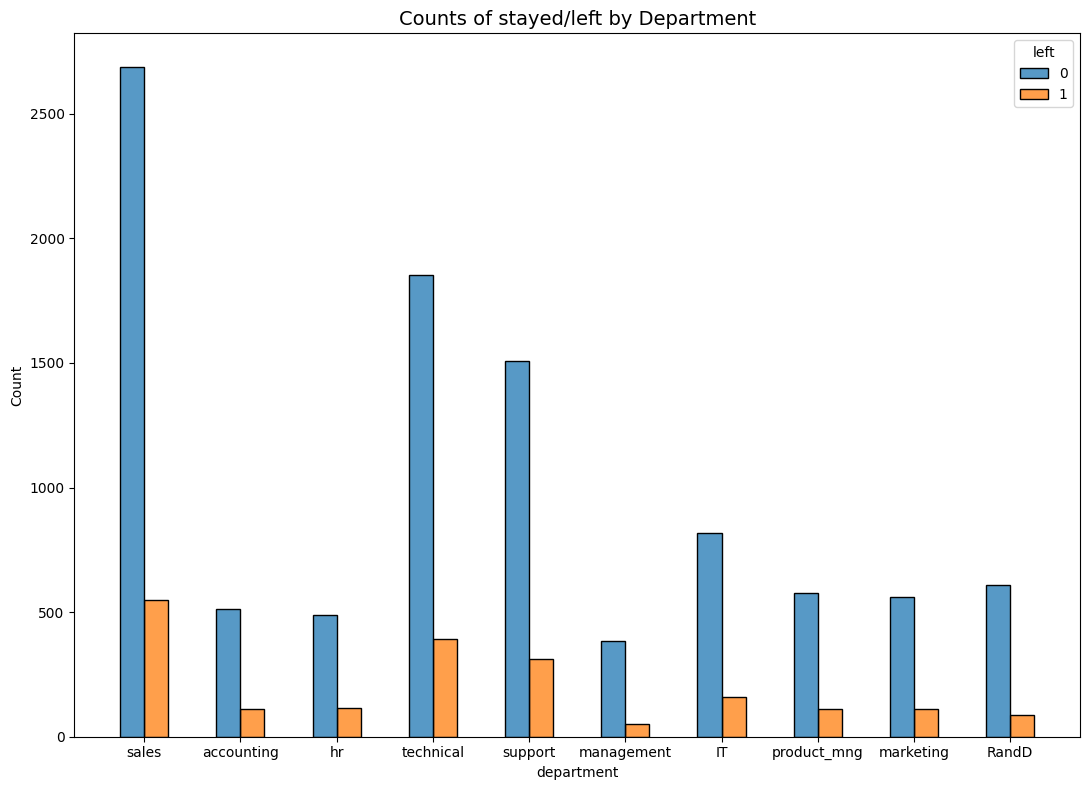

In [23]:
#histogram for department distribution - stayed vs left
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by Department', fontsize=14)
plt.tight_layout()
plt.show();


No department shows a significant difference in employee retention rate


### Insights

- Employees are leaving due to poor management.
- Leaving is linked to longer hours, many projects, and lower satisfaction.
- Long hours without promotions or good evaluations are ungratifying.
- Many employees might be burned out, working past typical 40hr weeks.
- Employees with over six years at the company tend to stay.


# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

- The goal is to predict whether an employee leaves the company, a categorical outcome variable.
- This task involves binary classification, as the outcome variable (left) can be either 1 (employee left) or 0 (employee didn't leave).


### Identify the types of models most appropriate for this task.

Since the variable to predict (whether an employee leaves the company) is categorical, we have two options:

1. Build a **Logistic Regression model**.
2. Build a **Tree-based Machine Learning model**.




### Model 1. **Binomial Logistic Regression** for Binary Classification

#### Preparation

In [24]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


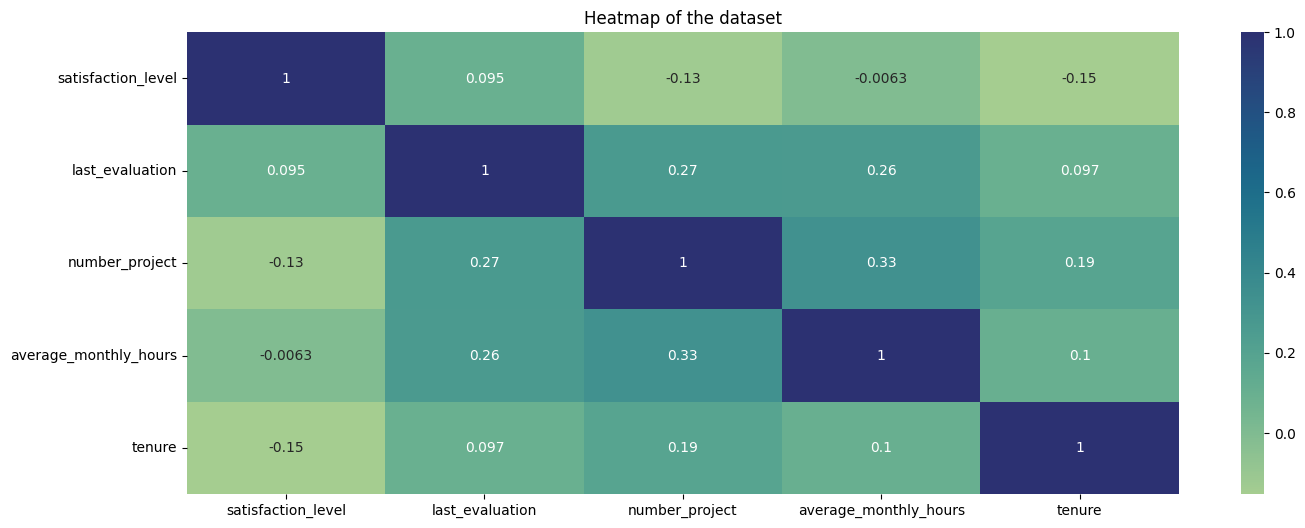

In [25]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(16, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [26]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower) & (df_enc['tenure'] <= upper)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [27]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [28]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [29]:
#check class balance
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

- The data has an 83%-17% split, indicating a slight imbalance.
- The imbalance is not severe enough to require resampling.


#### Instantiate Logistic Regression Class to fit on train set. - Make Predictions on test set.

In [30]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [31]:
#Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state = 42, max_iter=500).fit(X_train, y_train)

In [32]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

#### Confusion Matrix and Classification Report for Logistic Regression


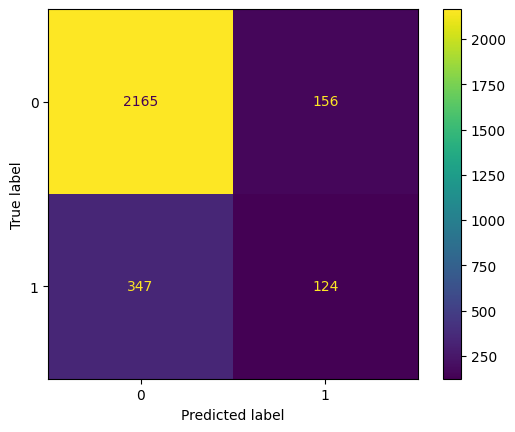

In [33]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

In [34]:
# Create classification report for logistic regression model
target_names = ['Predicted to stay', 'Predicted to leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

 Predicted to stay       0.86      0.93      0.90      2321
Predicted to leave       0.44      0.26      0.33       471

          accuracy                           0.82      2792
         macro avg       0.65      0.60      0.61      2792
      weighted avg       0.79      0.82      0.80      2792



### Model 2. Tree-Based Classification

In [35]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [36]:
# Select the features
X = df_enc.drop('left', axis=1)

# Display the first few rows of `X`
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### **Tree 1**

In [38]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy', 
    'precision': 'precision', 
    'recall': 'recall', 
    'f1': 'f1', 
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [39]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 2.92 s
Wall time: 3.13 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [40]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [41]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

In [42]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [43]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


#### **Random Forest 1**

In [44]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': 'accuracy', 
    'precision': 'precision', 
    'recall': 'recall', 
    'f1': 'f1', 
    'roc_auc': 'roc_auc'
}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [45]:
%%time
#rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/antar/Documents/Obsidian Vault/Projects/Salifort_Employee_Retention/'


In [47]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        


In [48]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [49]:
# Write pickle
#write_pickle(path, rf1, 'hr_rf1')

In [50]:
#%pip install scikit-learn==1.2.2

In [51]:
# Read pickle

rf1 = read_pickle(path, 'hr_rf1')

In [54]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [55]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [56]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


- The random forest model's evaluation scores are better than the decision tree model's.
- The exception is recall, where the random forest model is only 0.001 lower, which is negligible.
- Overall, the random forest model mostly outperforms the decision tree model.


In [57]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [58]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


- The test scores closely match the validation scores, indicating a strong model.
- This similarity suggests good model performance.
- Since the test set was used only for this model, you can be confident in its performance on new, unseen data.


#### Feature Engineering

There might be skepticism regarding the high evaluation scores, as data leakage could be occurring. Data leakage happens when data that should not be used during training is included, either because it appears in the test data or because it is not expected to be available when the model is deployed. Training with leaked data can result in unrealistic scores that do not hold up in production.

In this scenario, the company may not have satisfaction levels reported for all employees. Additionally, the `average_monthly_hours` column might contribute to data leakage, as employees who have decided to quit or have been identified for termination might be working fewer hours.

The initial decision tree and random forest models included all variables as features. The next round will involve feature engineering to build improved models.

Proceeding with this approach, the `satisfaction_level` can be dropped, and a new feature, `overworked`, can be created. This new feature will be a binary variable that roughly indicates whether an employee is overworked.


In [59]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

# Display first few rows of new dataframe
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [60]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


In [61]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

In [62]:
# Drop the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Display first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


In [63]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [64]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Tree 2

In [65]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [67]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 2.5 s
Wall time: 2.56 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'recall', 'precision', 'accuracy', 'roc_auc'})

In [68]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [69]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

In [70]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores declined, which is expected since fewer features were considered in this round of the model. Despite this, the scores remain very good.


#### Random forest - 2

In [71]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [72]:
%%time
#rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: total: 0 ns
Wall time: 0 ns


In [73]:
# Write pickle
#write_pickle(path, rf2, 'hr_rf2')

In [74]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [75]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [76]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [77]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


The scores dropped slightly again, but the random forest outperforms the decision tree when using AUC as the deciding metric.


In [78]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


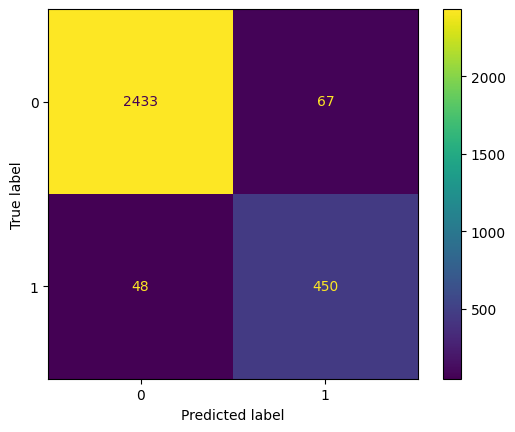

In [79]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, indicating that some employees may be incorrectly identified as at risk of quitting or being fired. Despite this, it remains a strong model.

For exploratory purposes, inspecting the decision tree model's splits and the most important features in the random forest model would be beneficial.


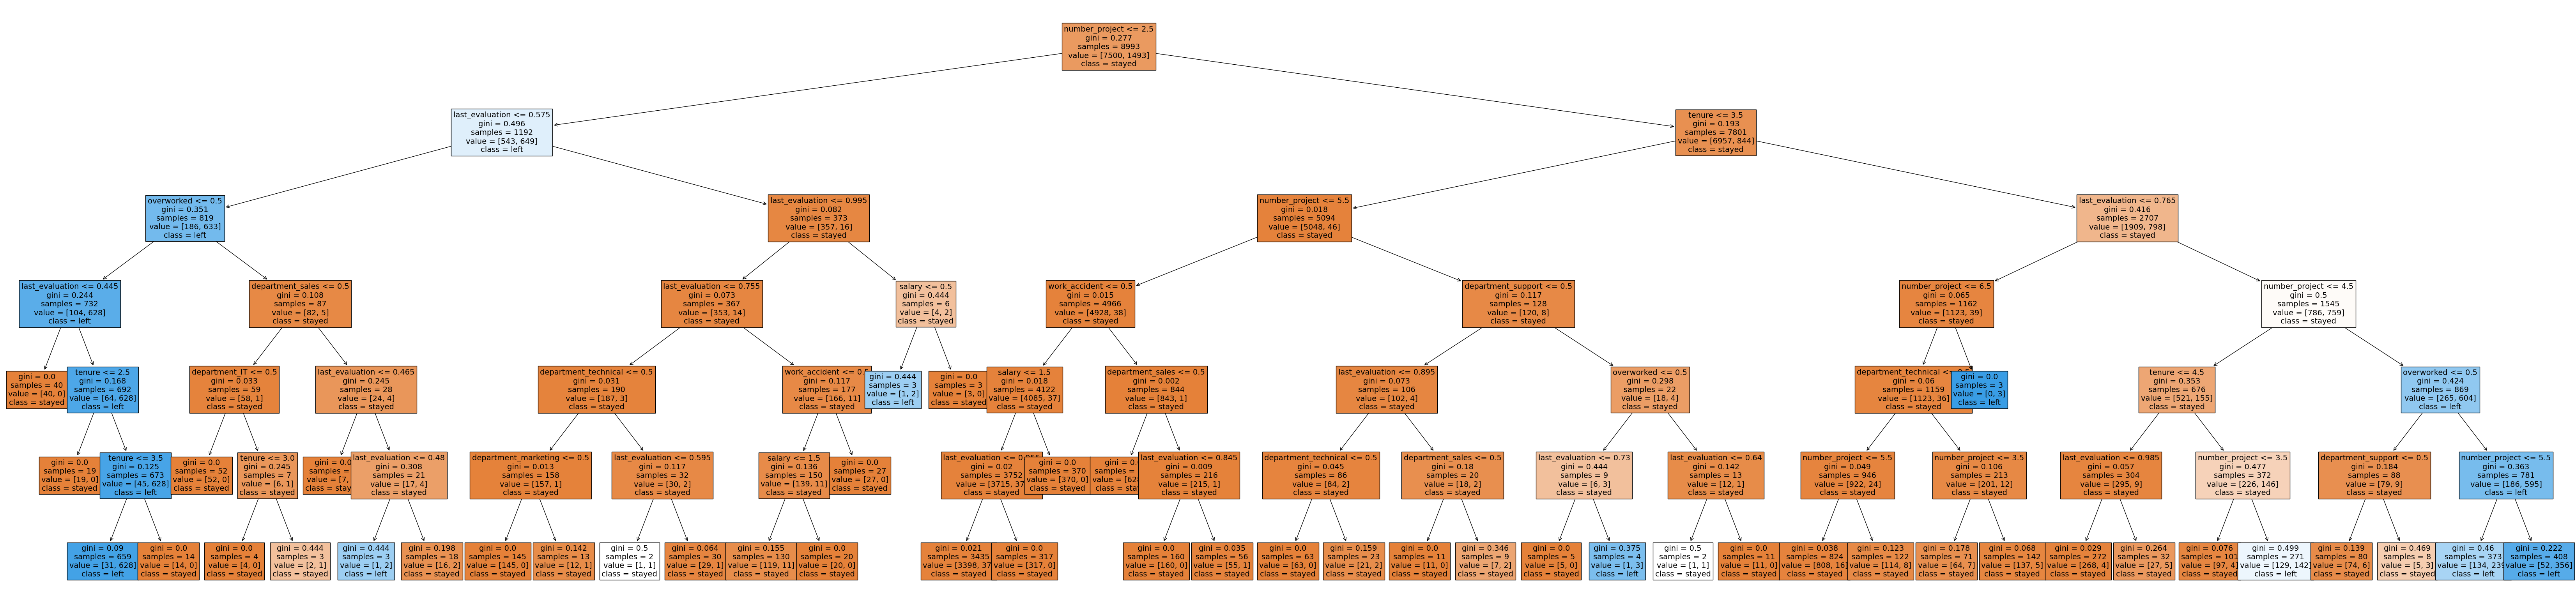

In [80]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [81]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


##### Feature Importance

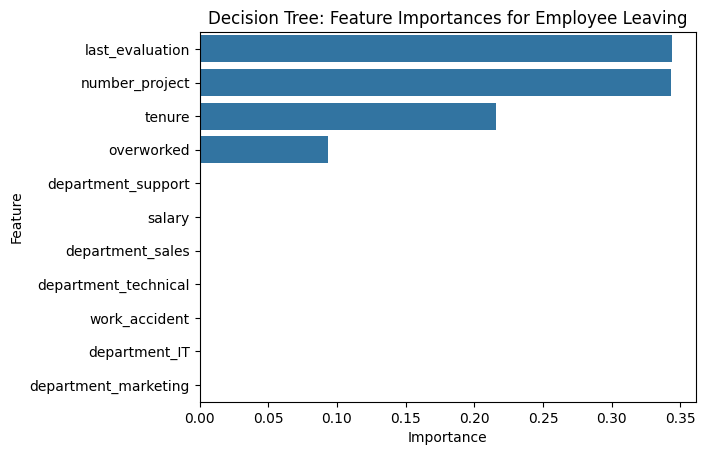

In [82]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

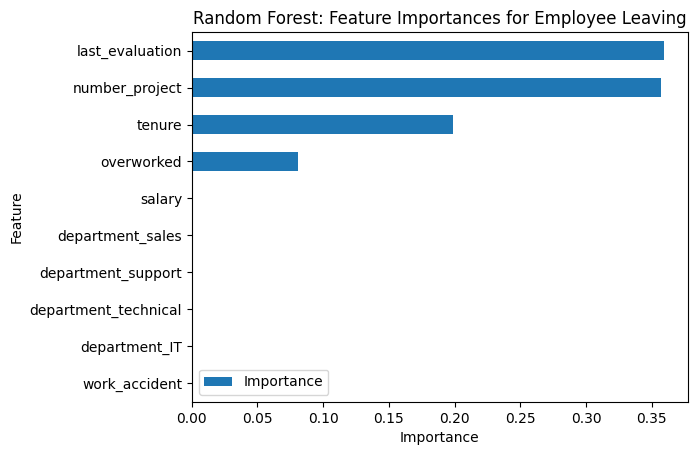

In [83]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**
- Precision: 80% (weighted average)
- Recall: 83% (weighted average)
- F1-score: 80% (weighted average)
- Accuracy: 83% (test set)

**Tree-based Machine Learning**
- **Decision Tree Model**
  - AUC: 93.8%
  - Precision: 87.0%
  - Recall: 90.4%
  - F1-score: 88.7%
  - Accuracy: 96.2% (test set)
- **Random Forest Model**
  - Modestly outperformed the decision tree model.



The models and their feature importances confirm that employees are experiencing overwork.

### Recommendations to Retain Employees

* Limit the number of projects assigned to each employee.
* Promote employees who have been with the company for at least four years or investigate the dissatisfaction among four-year tenured employees.
* Either compensate employees for extended working hours or reduce the requirement for long hours.
* Ensure employees are aware of overtime pay policies and clearly communicate workload and time off expectations.
* Conduct company-wide and team-specific discussions to understand and improve the work culture.
* Avoid reserving high evaluation scores for those working 200+ hours per month; implement a proportional reward system based on effort and contribution.
